In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
# # fili = 'Rhine_ESI-14_w28_j20_e15.csv'
# # fili = 'Rhine_SPEI-21_w28_j20_e15.csv'
# fili = 'Rhine_SMI-7_w28_j20_e15.csv'
# diri = '/perm/nklm/Px_flashdroughts/ERA5_FD_events/'

# startyear = 1950
# endyear = 2022



In [110]:
def get_info_from_filename(fili):
    '''
    Purpose: string splitting to extract some information from the input file name.

    Input: File name of CSV file with all variations in it (string)
        example: 'Rhine_ESI14_dwindow21_jump-2.0.csv'
    Output: (list of strings, len=4)
        basin: River basin (example: Rhine)
        indexscale: index + scale (example: ESI14)
        window: amount of days over which we take the jump (example: 21)
        jump: jump in index (example: 2.0)
        end_threshold: end threshold of index (example: -1.5)
    '''
    basin, indexscale = fili.split('_')[0:-3]
    window = int(fili.split('_')[-3][-2::])
    jump = int(fili.split('_')[-2].split('.')[0][-2::])/10
    end_threshold = float(fili.split('_')[-1].split('.')[0][-2::])/10
    return basin, indexscale, window, jump, end_threshold

In [111]:
def read_in_csv(diri,fili):
    df = pd.read_csv(diri+fili, index_col=0)
    return df


In [117]:
def stats_FDs(df,startyear,endyear):
    nyears = endyear - startyear
    FDs_per_year = round(len(df)/nyears,4)
    FDs_per_month = round(len(df)/12,4)

    return FDs_per_year,FDs_per_month

In [120]:
def plot_FDs_statistics(diri,fili,startyear,endyear, diro):
    basin, indexscale, window, jump, end_threshold = get_info_from_filename(fili)
    df = read_in_csv(diri,fili)
    FDs_per_year,FDs_per_month = stats_FDs(df,startyear,endyear)


    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(9, 3))

    df['year'].plot(kind='hist',bins=72, ax=ax1)
    ax1.set_title(f'Events per year (avg: {FDs_per_year})')

    # months=['J','F','M','A','M','J','J','A','S','O','N','D']
    df['month'].plot(kind='hist',bins=12, ax=ax2)
    ax2.set_title(f'Events per month (avg: {FDs_per_month})')

    plt.suptitle(f'{basin} {startyear}-{endyear}, {indexscale}, w{window}, j{jump}, e-{end_threshold}')
    plt.tight_layout()
    filo = f'FD_stats_{basin}_{indexscale}_w{window}_j{jump}_e-{end_threshold}.png'
    plt.savefig(diro+filo)




In [106]:
def main():
    diri = '/perm/nklm/Px_flashdroughts/ERA5_FD_events/'
    diro = '/home/nklm/Px_drought/flashdroughts/index_definitions/figures/'
    startyear=1950
    endyear=2022
    basin = 'Rhine'

    end_threshold = -1.5
    end_thresholdout = int(abs(end_threshold)*10)


    # for index in ['SPI','SPEI','ESI','SMI']:
    #     for scale in [7,14,21,28]:
    #         for window in [7,14,21,28]:
    #             for jump in np.arange(-1.5,-2.5,-0.5): 
    for index in ['SMI']:
        for scale in [7,]:
            for window in [21,28]:
                for jump in np.arange(-1.5,-2.5,-0.5): 
                    jumpout = int(abs(jump)*10)
                    

                    fili = f'{basin}_{index}-{scale}_w{window}_j{jumpout}_e{end_thresholdout}.csv'
                    plot_FDs_statistics(diri,fili,startyear,endyear, diro)

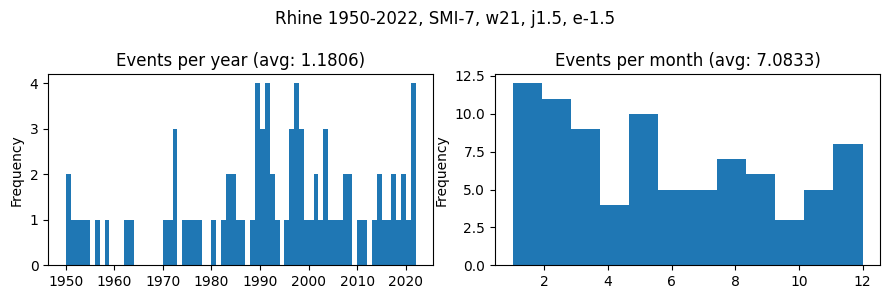

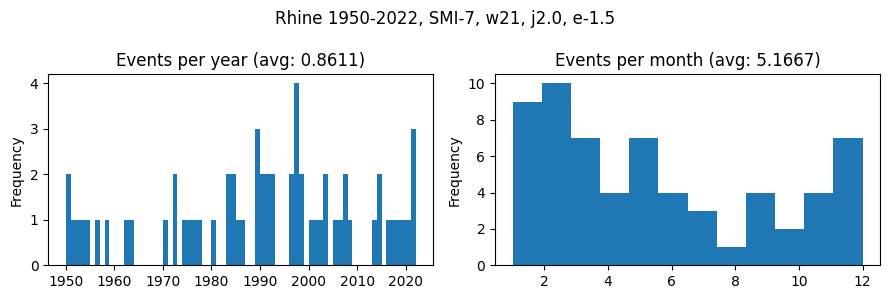

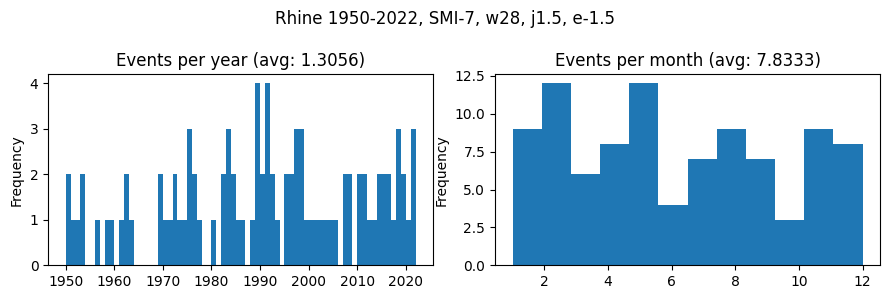

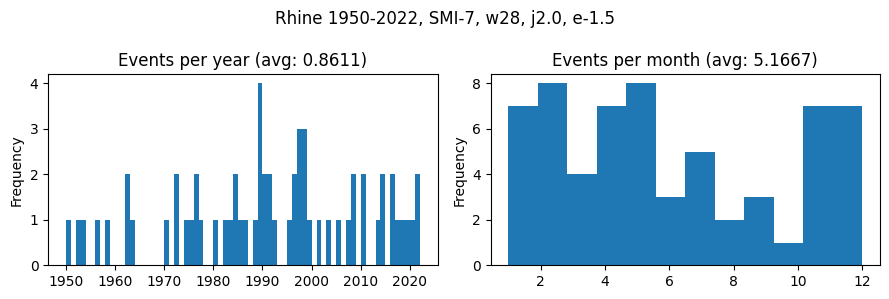

In [122]:
diri = '/perm/nklm/Px_flashdroughts/ERA5_FD_events/'
diro = '/home/nklm/Px_drought/flashdroughts/index_definitions/figures/'
startyear=1950
endyear=2022
basin = 'Rhine'
end_threshold = -1.5
end_thresholdout = int(abs(end_threshold)*10)
# for index in ['SPI','SPEI','ESI','SMI']:
#     for scale in [7,14,21,28]:
#         for window in [7,14,21,28]:
#             for jump in np.arange(-1.5,-2.5,-0.5): 
for index in ['SMI']:
    for scale in [7,]:
        for window in [21,28]:
            for jump in np.arange(-1.5,-2.5,-0.5): 
                jumpout = int(abs(jump)*10)
                
                fili = f'{basin}_{index}-{scale}_w{window}_j{jumpout}_e{end_thresholdout}.csv'
                plot_FDs_statistics(diri,fili,startyear,endyear, diro)

In [66]:
basin, indexscale, window, jump, end_threshold = get_info_from_filename(fili)

In [100]:
df = pd.read_csv(diri+fili, index_col=0)
FDs_per_year = round(len(df)/nyears,2)
FDs_per_month = round(len(df)/12,2)

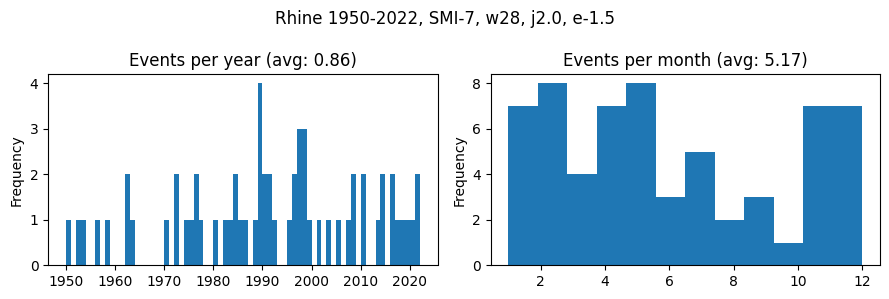

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(9, 3))

df['year'].plot(kind='hist',bins=72, ax=ax1)
ax1.set_title(f'Events per year (avg: {FDs_per_year})')

# months=['J','F','M','A','M','J','J','A','S','O','N','D']
df['month'].plot(kind='hist',bins=12, ax=ax2)
ax2.set_title(f'Events per month (avg: {FDs_per_month})')


plt.suptitle(f'{basin} {startyear}-{endyear}, {indexscale}, w{window}, j{jump}, e-{end_threshold}')
plt.tight_layout()


Text(0.5, 1.0, 'Rhine, SMI-7, w28, j2.0, e-1.5')

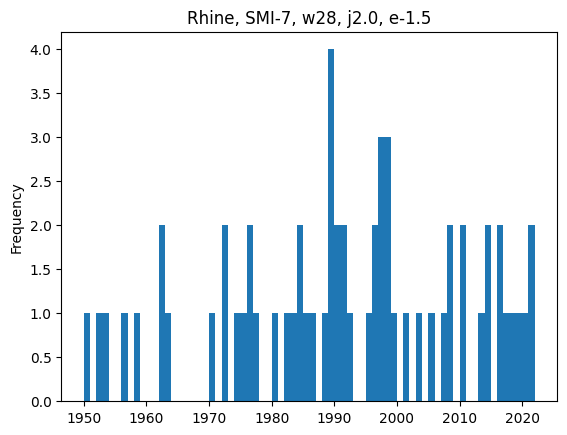

In [68]:
df['year'].plot(kind='hist',bins=72)
plt.title(f'{basin}, {indexscale}, w{window}, j{jump}, e-{end_threshold}')

Text(0.5, 1.0, 'Rhine, SMI-7, w28, j2.0, e-1.5')

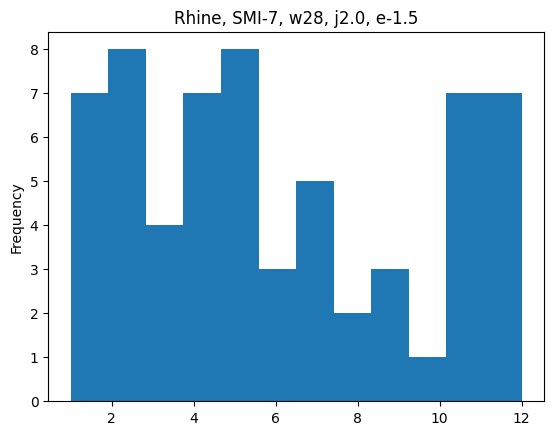

In [69]:
df['month'].plot(kind='hist',bins=12)
plt.title(f'{basin}, {indexscale}, w{window}, j{jump}, e-{end_threshold}')

Text(0.5, 1.0, 'Rhine, ESI-14, w28, j2.0, e-1.5')

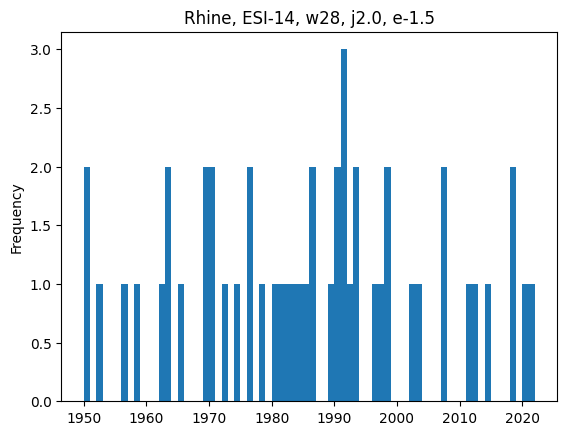

In [63]:
df['year'].plot(kind='hist',bins=72)
plt.title(f'{basin}, {indexscale}, w{window}, j{jump}, e-{end_threshold}')

Text(0.5, 1.0, 'Rhine, ESI-14, w28, j2.0, e-1.5')

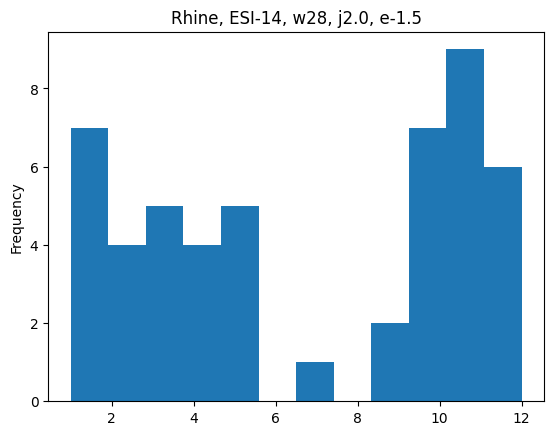

In [64]:
df['month'].plot(kind='hist',bins=12)
plt.title(f'{basin}, {indexscale}, w{window}, j{jump}, e-{end_threshold}')

Text(0.5, 1.0, 'Rhine, SPEI-21, w28, j2.0, e-1.5')

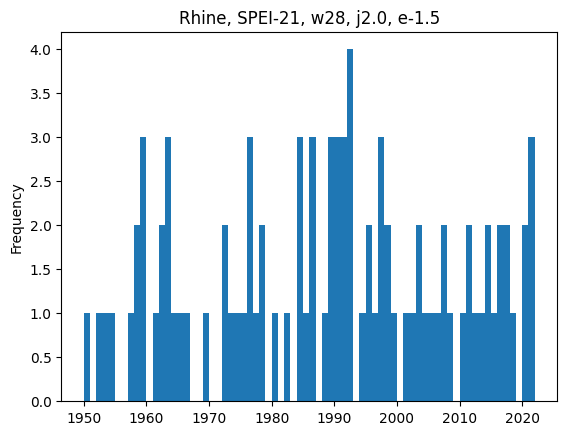

In [58]:
df['year'].plot(kind='hist',bins=72)
plt.title(f'{basin}, {indexscale}, w{window}, j{jump}, e-{end_threshold}')

Text(0.5, 1.0, 'Rhine, SPEI-21, w28, j2.0, e-1.5')

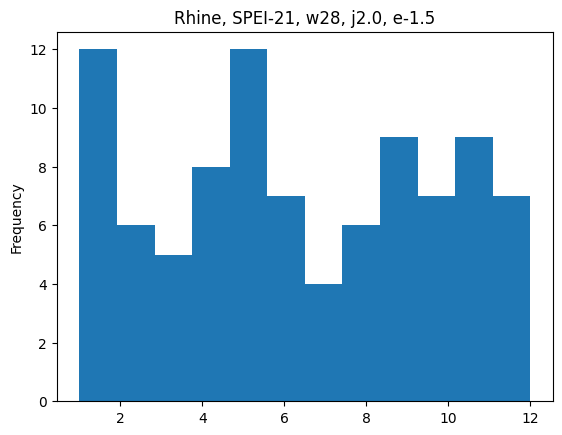

In [59]:
df['month'].plot(kind='hist',bins=12)
plt.title(f'{basin}, {indexscale}, w{window}, j{jump}, e-{end_threshold}')

In [26]:
# df["FD_startdate"] = df["FD_startdate"].astype("datetime64")
# df['year'].groupby(df["FD_startdate"].dt.year).count().plot(kind='bar')

Text(0.5, 1.0, 'Rhine, ESI-14, w28, j2.0, e-1.5')

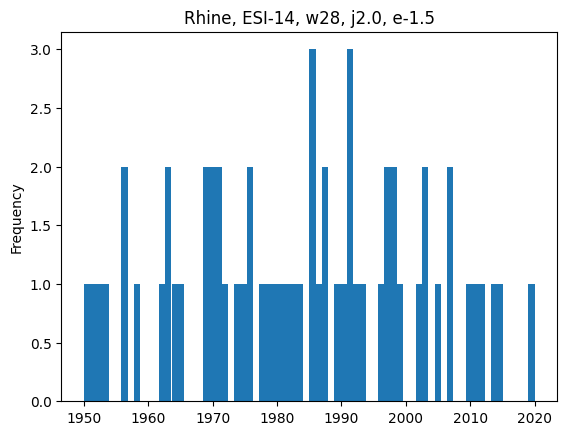

In [49]:
df['year'].plot(kind='hist',bins=72)
plt.title(f'{basin}, {indexscale}, w{window}, j{jump}, e-{end_threshold}')

Text(0.5, 1.0, 'Rhine, ESI-14, w28, j2.0, e-1.5')

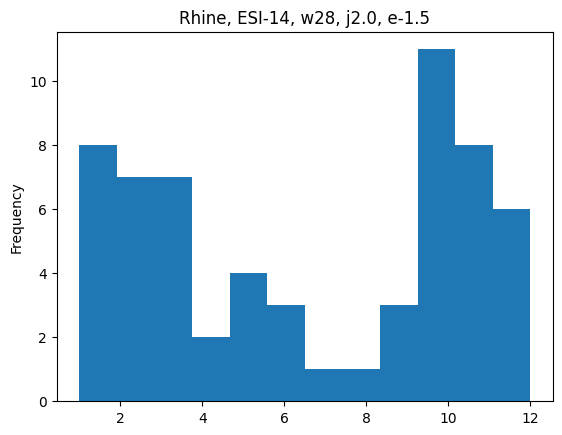

In [50]:
df['month'].plot(kind='hist',bins=12)
plt.title(f'{basin}, {indexscale}, w{window}, j{jump}, e-{end_threshold}')

In [76]:
round(len(df)/nyears,2)

0.86

In [74]:
df

,FD_startdate,year,month,day
indiv_event,,,,
0,1950-11-27,1950,11,27
1,1952-12-16,1952,12,16
2,1953-02-21,1953,2,21
3,1956-01-24,1956,1,24
4,1958-11-05,1958,11,5
...,...,...,...,...
57,2018-02-01,2018,2,1
58,2019-12-29,2019,12,29
59,2020-03-01,2020,3,1
